In [1]:
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
true = pd.read_csv('true.csv')
fake = pd.read_csv('fake.csv')

In [3]:
true['fake'] = 0

In [4]:
fake['fake'] = 1

In [5]:
data = pd.concat([true, fake])

In [6]:
data.head()

,title,text,subject,date,fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


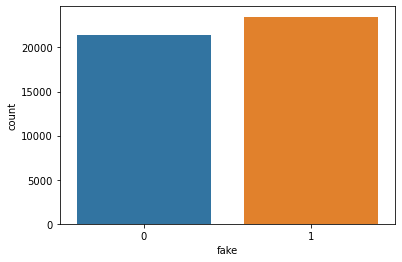

In [7]:
sns.countplot(data.fake)

In [8]:
data.isna().sum()

title      0
text       0
subject    0
date       0
fake       0
dtype: int64

In [9]:
data['text'] = data['title'] + ' ' + data['text']

In [10]:
data = data.drop(['title', 'subject', 'date'], axis = 1)

In [11]:
data.head()

,text,fake
0,"As U.S. budget fight looms, Republicans flip t...",0
1,U.S. military to accept transgender recruits o...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,0
3,FBI Russia probe helped by Australian diplomat...,0
4,Trump wants Postal Service to charge 'much mor...,0


In [12]:
# Logist Regression Classifier

x_train,x_test,y_train,y_test = train_test_split(data['text'], data.fake, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 98.83%


In [13]:
print(confusion_matrix(y_test, prediction))

[[4253   45]
 [  60 4622]]


In [14]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4298
           1       0.99      0.99      0.99      4682

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [15]:
# SVC

x_train,x_test,y_train,y_test = train_test_split(data['text'], data.fake, test_size=0.2, random_state=2020)

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])

model = pipe.fit(x_train, y_train)
prediction = model.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 99.58%


In [16]:
print(confusion_matrix(y_test, prediction))

[[4283   15]
 [  23 4659]]


In [17]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4298
           1       1.00      1.00      1.00      4682

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

